In [38]:
import pandas as pd
import os
from matplotlib import pyplot as plt

pd.set_option("display.width", 500)
pd.set_option("display.max_colwidth", 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

In [2]:
COLS_RENAME = {
    'Nome Órgao': 'orgao', 
    'Nome Elemento Despesa': 'elemento_despesa', 
    'Nome Função': 'funcao', 
    'Nome Subfunção': 'subfuncao',
    'Nome Programa': 'programa', 
    'Nome Ação': 'acao', 
    'Código Favorecido': 'cod_favorecido', 
    'Nome Favorecido': 'nome_favorecido', 
    'Data Pagamento': 'data', 
    'Valor': 'valor'
}

READ_CSV_CFG = {
    "sep": "\t",
    "encoding": "iso-8859-1", 
    "decimal": ",",
    "usecols": COLS_RENAME.keys(),
    "iterator": True,
    "chunksize": 10000
}


def read_csv(filepath):
    #http://stackoverflow.com/questions/13651117/pandas-filter-lines-on-load-in-read-csv
    iter_csv = pd.read_csv(filepath, **READ_CSV_CFG)

    df = pd.concat([chunk[chunk['Nome Órgao'] == 'UNIVERSIDADE FEDERAL DO CEARA'] for chunk in iter_csv])
    df.rename(columns=COLS_RENAME, inplace=True)

    df['data'] = pd.to_datetime(df.data, format="%d/%m/%Y", errors="coerce")
    
    return df

In [3]:
GASTOS_DIR = "../data/raw/federal/despesas/gastos diretos/"

gastos_csv = [os.path.join(GASTOS_DIR, filename) for filename in os.listdir(GASTOS_DIR) if filename.endswith(".csv")]

In [4]:
df = pd.DataFrame()

for csv in gastos_csv:
    
    df_ = read_csv(csv)

    df = df.append(df_, ignore_index=True)

In [5]:
df.shape

(61515, 10)

In [6]:
gastos_csv

['../data/raw/federal/despesas/gastos diretos/201606_GastosDiretos.csv',
 '../data/raw/federal/despesas/gastos diretos/201607_GastosDiretos.csv',
 '../data/raw/federal/despesas/gastos diretos/201608_GastosDiretos.csv',
 '../data/raw/federal/despesas/gastos diretos/201609_GastosDiretos.csv',
 '../data/raw/federal/despesas/gastos diretos/201610_GastosDiretos.csv',
 '../data/raw/federal/despesas/gastos diretos/201611_GastosDiretos.csv',
 '../data/raw/federal/despesas/gastos diretos/201612_GastosDiretos.csv',
 '../data/raw/federal/despesas/gastos diretos/201701_GastosDiretos.csv']

In [7]:
df.to_csv("../data/processed/federal/despesas/gastos diretos/ufc_201606_201701.csv", index=False)

# Análise rápida

In [8]:
df.valor.sum()

171630609.9699845

In [9]:
df.nome_favorecido.value_counts().head(10)

SERVAL SERVICOS E LIMPEZA LTDA. [SERVAL]                                                684
CRIART SERVICOS DE TERCEIRIZACAO DE MAO DE OBRA LTDA [CRIART SERVICOS]                  567
COMPANHIA ENERGETICA DO CEARA [COELCE]                                                  534
VL HORIZONTE TRANSPORTES EIRELI  - ME [V L HORIZONTE TRANSPORTE]                        314
ENGEMIL - ENGENHARIA, EMPREENDIMENTOS,MANUTENCAO E INSTALACOES LTDA [ENGEMIL]           275
SERVIARM SERVICO DE VIGILANCIA ARMADA LTDA                                              212
BONTEMPO REFRIGERACAO LTDA - EPP [BONTEMPO ARCONDICIONADO]                              200
GARDEN LOCADORA E PRESTADORA DE SERVICOS EIRELI [CONSTRUTORA E LOCADORA GARDEN LTDA]    197
FUNDACAO CEARENSE DE PESQUISA E CULTURA [FCPC]                                          186
EMPRESA BRASIL DE COMUNICACAO S.A                                                       176
Name: nome_favorecido, dtype: int64

In [10]:
df.groupby(df.nome_favorecido).valor.sum().nlargest(10)

nome_favorecido
CRIART SERVICOS DE TERCEIRIZACAO DE MAO DE OBRA LTDA [CRIART SERVICOS]          15498998.67
BANCO DO BRASIL SA [DIRECAO GERAL]                                              13072165.77
ISM GOMES DE MATTOS EIRELI                                                      12922883.81
SERVIARM SERVICO DE VIGILANCIA ARMADA LTDA                                      11618493.20
COMPANHIA ENERGETICA DO CEARA [COELCE]                                          10482291.61
SERVAL SERVICOS E LIMPEZA LTDA. [SERVAL]                                         8113847.21
ENGEMIL - ENGENHARIA, EMPREENDIMENTOS,MANUTENCAO E INSTALACOES LTDA [ENGEMIL]    7101909.78
BANCO SANTANDER (BRASIL) S.A.                                                    7076826.29
FUNDACAO CEARENSE DE PESQUISA E CULTURA [FCPC]                                   6860370.52
CONSTRUTORA PLATO LTDA [CONSTRUTORA PLATO LTDA]                                  4198946.39
Name: valor, dtype: float64

In [11]:
df.groupby(df.elemento_despesa).valor.sum().nlargest(10)

elemento_despesa
Outros Serviços de Terceiros - Pessoa Jurídica             45349290.85
Locação de Mão-de-Obra                                     45341134.81
Obras e Instalações                                        18258428.42
Auxílio Financeiro a Estudantes                            17770987.88
Auxílio-Alimentação                                        15429234.96
Equipamentos e Material Permanente                          6467554.51
Indenizações e Restituições                                 6311029.40
Outros Serviços de Terceiros - Pessoa Física                4583113.75
Material de Consumo                                         4359957.80
Outros Benefícios Assistenciais do servidor e do militar    2024315.99
Name: valor, dtype: float64

In [12]:
df.groupby(df.elemento_despesa).apply(lambda x: x.valor.max())

elemento_despesa
Auxílio Financeiro a Estudantes                               4844.00
Auxílio Financeiro a Pesquisadores                            7500.00
Auxílio-Alimentação                                        1968808.97
Auxílio-Transporte                                           19720.20
Contratação por Tempo Determinado                            70511.14
Despesas de Exercícios Anteriores                           125288.11
Equipamentos e Material Permanente                          793092.00
Indenizações e Restituições                                 786586.59
Locação de Mão-de-Obra                                      774392.20
Material de Consumo                                         249457.43
Obras e Instalações                                         666149.23
Obrigações Tributárias e Contributivas                       31972.11
Outros Auxílios Financeiros a Pessoas Físicas               142276.24
Outros Benefícios Assistenciais do servidor e do militar    197655.75
Out

In [13]:
df[df.elemento_despesa.isin(['Auxílio Financeiro a Pesquisadores'])]\
.groupby('nome_favorecido').valor.sum().nlargest(10)

nome_favorecido
JOSE RAIMUNDO DE ARAUJO CARVALHO JUNIOR   60000.00
ANA SARA RIBEIRO PARENTE CORTEZ IRFFI     44000.00
ANA RITA FONTELES DUARTE                  33000.00
MARCIO VERAS CORREA                       27500.00
HELIO CORDEIRO DE MIRANDA                 22400.00
PEDRO HENRIQUE WATANABE                   21380.00
DANIEL RIBEIRO CARDOSO                    17600.00
DAVI ROMERO DE VASCONCELOS                17600.00
FRANCISCA RAIMUNDA NOGUEIRA MENDES        17600.00
FRANCISCO URIBAM XAVIER DE HOLANDA        17600.00
Name: valor, dtype: float64

In [14]:
df[df.elemento_despesa.isin(['Auxílio Financeiro a Estudantes'])]\
.groupby('nome_favorecido').valor.sum().nlargest(10)

nome_favorecido
ISAIAS MACIEL DOS SANTOS             11581.78
DELEON RODRIGO QUEIROZ DE SOUSA       9661.78
LUANA FAUSTINO SAMPAIO                9101.65
LUCAS ADRIANO RODRIGUES BRITO         9031.65
ANTONIO ELIOVALDO DA SILVA ANANIAS    8749.78
MARIAMA DRAME                         8696.00
NAIANE FERREIRA GOMES                 8621.78
LUCAS FERREIRA SANTOS                 8621.65
HENRIQUE BEZERRA DA SILVA             8501.78
ALAN LIUPEKEVICIUS CARNIELLI          8341.65
Name: valor, dtype: float64

In [15]:
rs = df[df.elemento_despesa.isin(['Auxílio Financeiro a Estudantes', 'Auxílio Financeiro a Pesquisadores'])]\
.groupby([df.nome_favorecido, df.elemento_despesa]).valor.sum().unstack()

In [16]:
rs[rs['Auxílio Financeiro a Estudantes'].notnull() & rs['Auxílio Financeiro a Pesquisadores'].notnull()]

elemento_despesa,Auxílio Financeiro a Estudantes,Auxílio Financeiro a Pesquisadores
nome_favorecido,,
LARA TIMBO DE CASTRO MOTA,4200.00,600.00
LIGIA TORNISIELLO,4700.00,600.00
MIRIAN CRISTINA GOMES COSTA,2500.00,812.00
VICTOR SALVADOR ROCHA,4200.00,600.00


In [17]:
df[df.nome_favorecido == 'MIRIAN CRISTINA GOMES COSTA']

,orgao,elemento_despesa,funcao,subfuncao,programa,acao,cod_favorecido,nome_favorecido,data,valor
30436,UNIVERSIDADE FEDERAL DO CEARA,Auxílio Financeiro a Estudantes,Educação,Ensino Superior,Educação de qualidade para todos,Concessão de Bolsas de Estudos no Ensino Superior,24668879835,MIRIAN CRISTINA GOMES COSTA,2016-10-10,2500.00
36290,UNIVERSIDADE FEDERAL DO CEARA,Auxílio Financeiro a Pesquisadores,Educação,Ensino Superior,Educação de qualidade para todos,Concessão de Bolsas de Estudos no Ensino Superior,24668879835,MIRIAN CRISTINA GOMES COSTA,2016-10-10,812.00


In [18]:
rs = df\
.groupby([df.nome_favorecido, df.elemento_despesa]).valor.sum().unstack()

In [19]:
df.columns

Index(['orgao', 'elemento_despesa', 'funcao', 'subfuncao', 'programa', 'acao', 'cod_favorecido', 'nome_favorecido', 'data', 'valor'], dtype='object')

In [26]:
df.sample().T

,21144
orgao,UNIVERSIDADE FEDERAL DO CEARA
elemento_despesa,Outros Serviços de Terceiros - Pessoa Física
funcao,Educação
subfuncao,Ensino Superior
programa,Educação de qualidade para todos
acao,Funcionamento de Instituições Federais de Ensino Superior
cod_favorecido,62209981387
nome_favorecido,PAULA SACHA GOMES TAVARES
data,2016-08-04 00:00:00
valor,400.00


In [28]:
df.elemento_despesa.unique()

array(['Contratação por Tempo Determinado',
       'Outros Benefícios Assistenciais do servidor e do militar',
       'Auxílio Financeiro a Estudantes',
       'Auxílio Financeiro a Pesquisadores', 'Material de Consumo',
       'Passagens e Despesas com Locomoção', 'Serviços de Consultoria',
       'Outros Serviços de Terceiros - Pessoa Física',
       'Locação de Mão-de-Obra',
       'Outros Serviços de Terceiros - Pessoa Jurídica',
       'Auxílio-Alimentação', 'Obrigações Tributárias e Contributivas',
       'Outros Auxílios Financeiros a Pessoas Físicas',
       'Auxílio-Transporte', 'Pensões Especiais',
       'Despesas de Exercícios Anteriores', 'Indenizações e Restituições',
       'Obras e Instalações', 'Equipamentos e Material Permanente'], dtype=object)

In [33]:
df[df.elemento_despesa == 'Auxílio Financeiro a Estudantes'].nome_favorecido.value_counts().nlargest(4)

LUANA FAUSTINO SAMPAIO                24
NAIANE FERREIRA GOMES                 22
RAQUEL DA SILVA GOMES                 22
PEDRO HENRIQUE SILVA DO NASCIMENTO    22
Name: nome_favorecido, dtype: int64

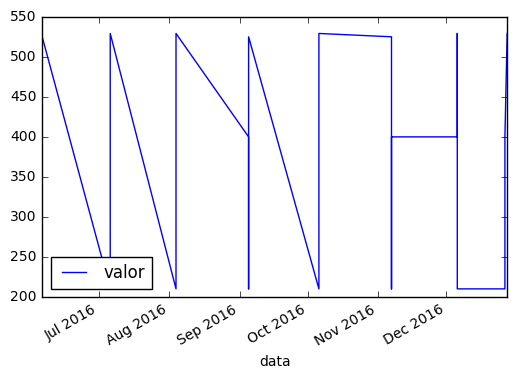

In [37]:
df[df.nome_favorecido == 'LUANA FAUSTINO SAMPAIO'].plot(x='data', y='valor')

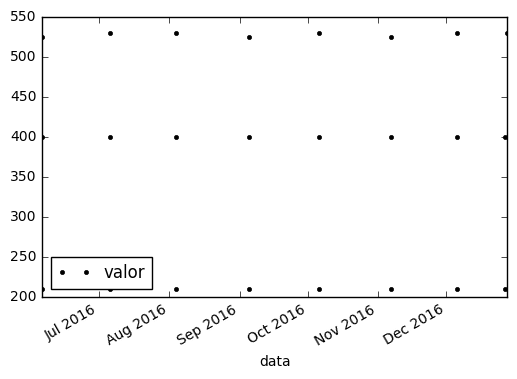

In [54]:
luana = df[df.nome_favorecido == 'LUANA FAUSTINO SAMPAIO']

luana.set_index('data').plot(style="k. ")

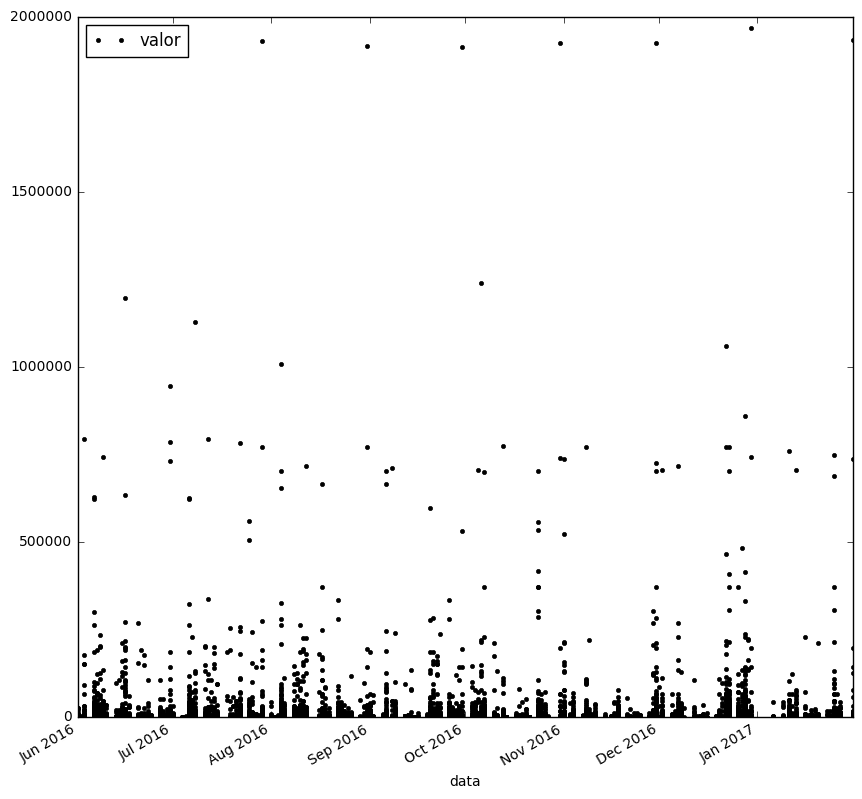

In [56]:
df.set_index('data').plot(style="k. ", figsize=(10, 10))

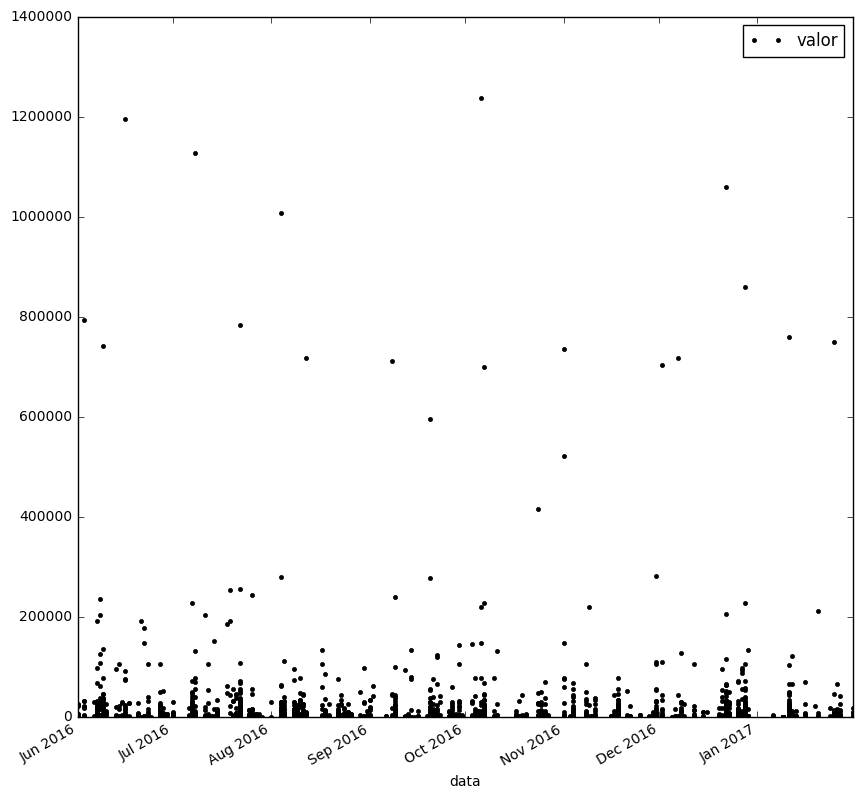

In [58]:
df[df.elemento_despesa == 'Outros Serviços de Terceiros - Pessoa Jurídica'].set_index('data').plot(style='k. ', figsize=(10, 10))